# Reading the Data

This particular dataset were consisted of four databases that dates back from early 1998, the databases were collected from hospitals in Cleveland, Hungary, Switzerland, and Long Beach VA. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

The Number of instances that are in this dataset are in total of 303. It is a multivariate data set, containing 14 variables that are 



        1. Age
        2. Sex (1 = male; 0 = female) 
        3. Chest pain type (4 values)
        4. resting blood pressure
        5. serum cholestoral in mg/dl
        6. fasting blood sugar > 120 mg/dl
        7. resting electrocardiographic results (values 0,1,2)
        8. maximum heart rate achieved
        9. exercise induced angina
        10. oldpeak = ST depression induced by exercise relative to rest
        11. the slope of the peak exercise ST segment
        12. number of major vessels (0-3) colored by flourosopy
        13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        14. target (The presence of heart disease in the patient, 0 = no disease and 1 = disease)

The source of this dataset can be tracked with the mentioned URL (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)


In [1]:
import pandas as pd #dataframes
import numpy as np #numeral computing
import seaborn as sns #visualization
from matplotlib import pyplot as plt #visualization (scatter plots)
from sklearn.model_selection import train_test_split #splitting train and test datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix #Display AUC-ROC graph and score

In [2]:
data = pd.read_csv(r"F:\A.P.U\Final Year Project\Heart Disease Datasets.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Removing Duplicates from the Dataset

In [7]:
data.shape # rows, columns of original dataset

(303, 14)

In [8]:
data_duplicate = data[data.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
data_duplicate

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
data = data[~data.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
data.shape

(302, 14)

# Managing the Null Values in the Dataset

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

# Explotary Data Analysis

1    164
0    138
Name: target, dtype: int64


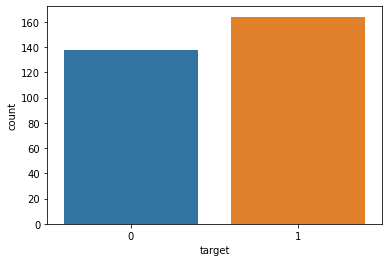

In [12]:
y = data["target"]
sns.countplot(y)
target_temp = data.target.value_counts()
print(target_temp)

In [13]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


In the dataset, there are more patients who have heart disease than the ones that didn't

In [14]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.79%
Percentage of Male Patients:68.21%


There are more male patients in the dataset

<AxesSubplot:xlabel='sex', ylabel='target'>

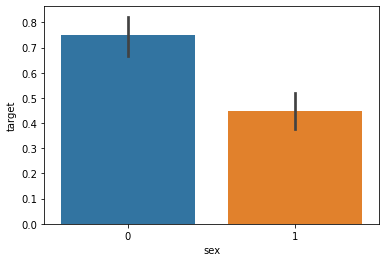

In [15]:
sns.barplot(data["sex"],data["target"])

Female are more likely to suffer from heart disease than male

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>],
       [<AxesSubplot:title={'center':'exercise_induced_angina'}>,
        <AxesSubplot:title={'center':'st_depression'}>,
        <AxesSubplot:title={'center':'st_slope'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>],
       [<AxesSubplot:title={'center':'thalassemia'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

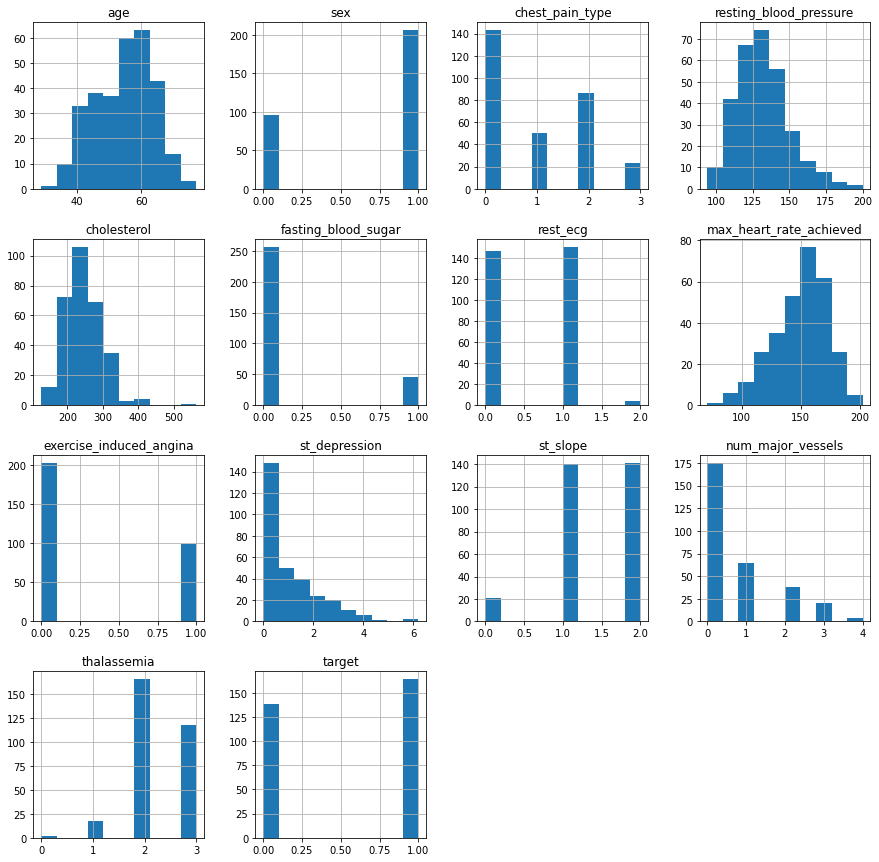

In [16]:
data.hist(figsize=(15,15))

In [17]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


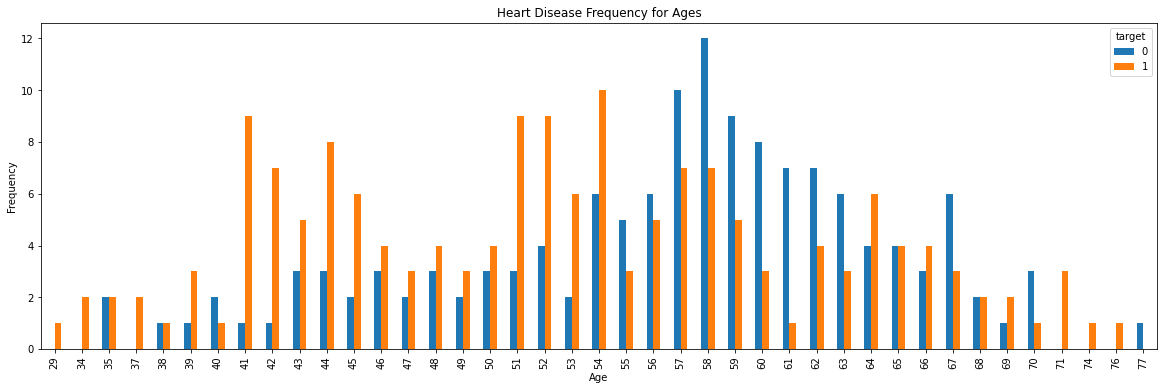

In [18]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Heart Disease may affect for patients with any ages, the data shows that patients around the age of 41 to 54 are most likely to suffer from heart disease

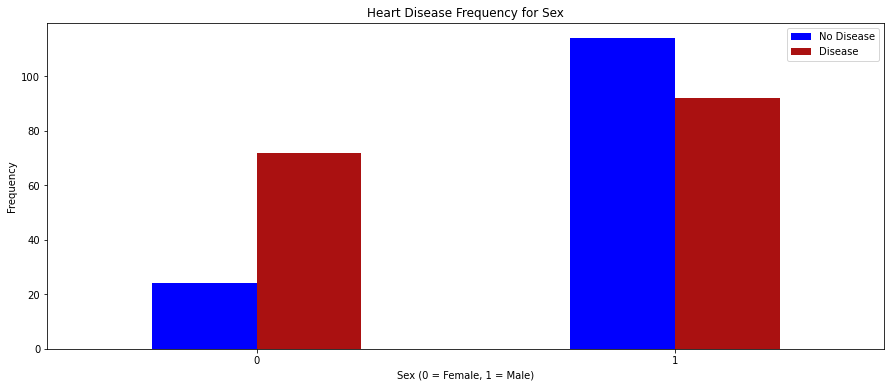

In [19]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

Heart Disease may affect patients with different gender. Though there are more male patients who dont have heart disease than the ones that does in the dataset

There are more females that suffers from heart disease in the dataset, than the ones that doesn't

In [20]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age','chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

data_transform = pd.DataFrame(data = data)
data_transform[numerical] = scaler.fit_transform(data[numerical])

display(data_transform.head(n = 5))

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0.708333,1,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


# 2D Scatter Plots

Scatter plot for Thalassemia and Cholesterol  

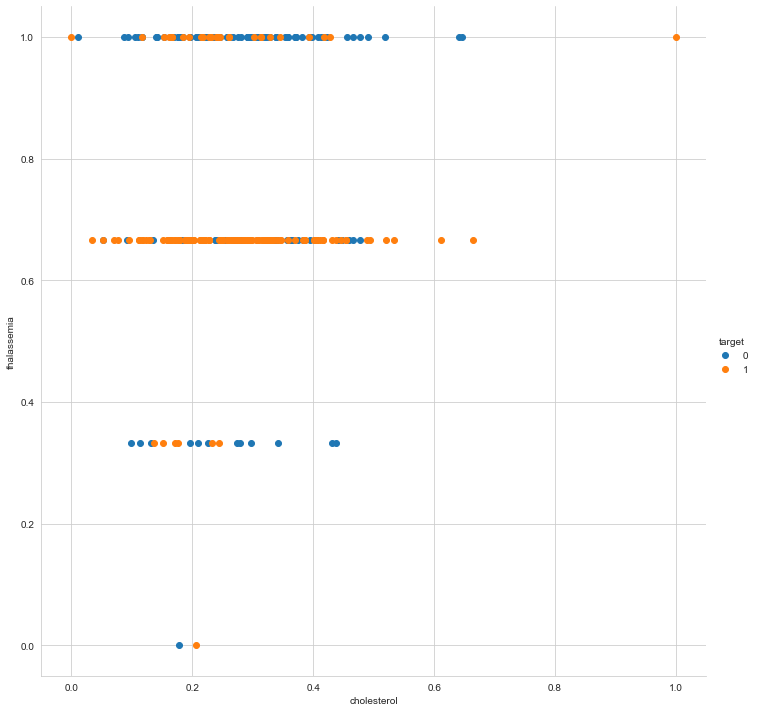

In [21]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'target', height = 10).map(plt.scatter, 'cholesterol', 'thalassemia').add_legend()

Scatter plot for Thalassemia and Resting Blood Pressure

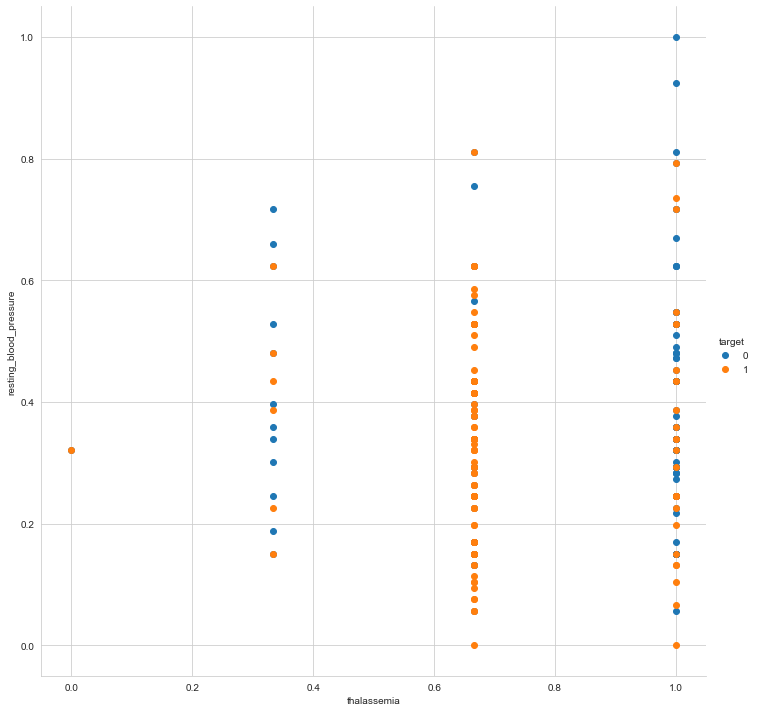

In [22]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'target', height = 10).map(plt.scatter, 'thalassemia', 'resting_blood_pressure').add_legend()

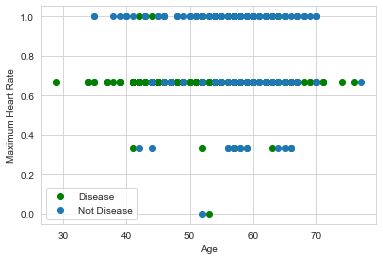

In [23]:
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

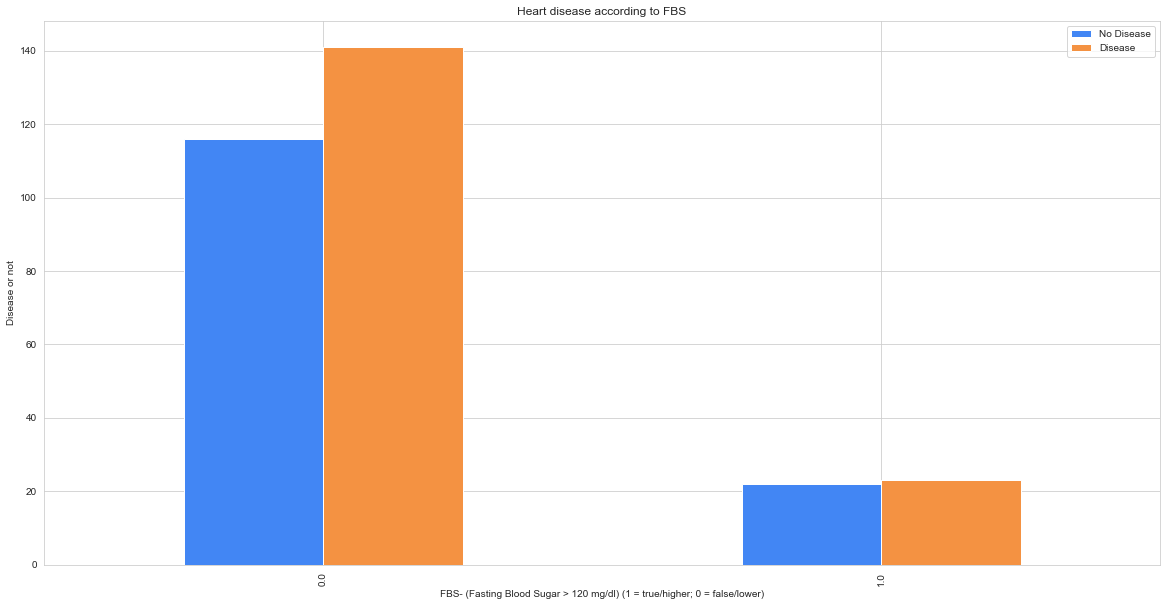

In [24]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true/higher; 0 = false/lower)')
plt.xticks(rotation=90)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Disease or not')
plt.show()

# Correlations of variables between one another

In [25]:
data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain_type,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
resting_blood_pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
rest_ecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
max_heart_rate_achieved,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exercise_induced_angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
st_depression,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

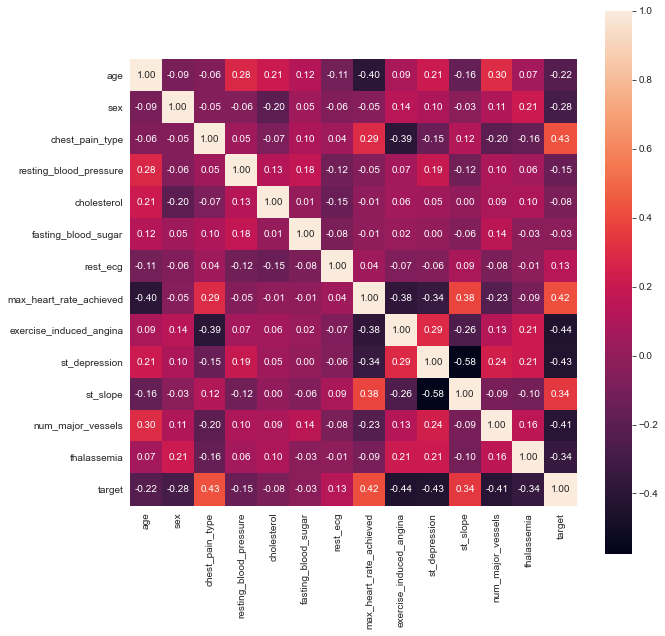

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

# Machine Learning Models

## Data Preparation

In [27]:
# Create separate object for target variable
y = data.target

# Create separate object for input features
X = data.drop('target', axis=1)

In [28]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=data.target)

In [29]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 13) (61, 13) (241,) (61,)


1    164
0    138
Name: target, dtype: int64


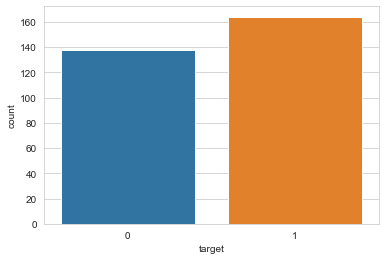

In [30]:
ax=sns.countplot(x='target',data=data)
print(data['target'].value_counts())

## Oversampling data

In [31]:
majority_class_len = len(data[data['target'] == 1])
print(majority_class_len)

164


In [32]:
minority_class_indices = data[data['target'] == 0].index
print(minority_class_indices)

Int64Index([165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            ...
            293, 294, 295, 296, 297, 298, 299, 300, 301, 302],
           dtype='int64', length=138)


In [33]:
random_minority_indices = np.random.choice(minority_class_indices,
                                          majority_class_len,
                                          replace=True)
print(len(random_minority_indices))

164


In [34]:
majority_class_indices = data[data['target'] == 1].index
print(majority_class_indices)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            154, 155, 156, 157, 158, 159, 160, 161, 162, 163],
           dtype='int64', length=164)


In [35]:
over_sample_indices=np.concatenate([majority_class_indices,random_minority_indices])

In [36]:
over_sample=data.loc[over_sample_indices]

<AxesSubplot:xlabel='target', ylabel='count'>

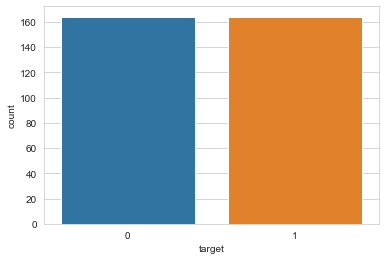

In [37]:
sns.countplot(x='target',data=over_sample)

In [38]:
X = over_sample.loc[:, data.columns!='target']
y = over_sample.loc[:, data.columns=='target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1. Decision Tree

In [39]:
def ConfusionMatrixToDataFrame (actual, predicted):
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    values = {'positive':{'true': tp, 'false': fp}, 'negative':{'true': tn, 'false': fn}}
    output_cm = pd.DataFrame(columns = ["true", "false"])
    for key, value in values.items():
        output_cm = output_cm.append(pd.Series(value, name = key))
    return output_cm

In [40]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import tree #Decision Tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score #Accuracy score
from sklearn.model_selection import RandomizedSearchCV # Perform hyperparameter tuning
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [41]:
DTmodel = model.best_estimator_
DTmodel

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [42]:
DT_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(DT_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(DT_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(DT_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(DT_y_train_preds, y_train),"\n")

DT_y_test_preds = model.predict(X_test)

DT_accuracy = accuracy_score(DT_y_test_preds, y_test)

print("Accuracy on testing set: ", DT_accuracy,"\n")

print("Precision on testing set: ", precision_score(DT_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(DT_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(DT_y_test_preds, y_test),"\n")

Accuracy on training set:  0.908675799086758 

Precision on training set:  0.8773584905660378 

Recall on training set:  0.93 

F1 score on training set:  0.9029126213592233 

Accuracy on testing set:  0.8532110091743119 

Precision on testing set:  0.8275862068965517 

Recall on testing set:  0.8888888888888888 

F1 score on testing set:  0.8571428571428572 



In [43]:
from sklearn.model_selection import StratifiedKFold #Cross Validation
cv = StratifiedKFold(n_splits=3)

In [44]:
from sklearn.model_selection import cross_val_score #Cross Validation
crossDT = cross_val_score(DTmodel,X,y,cv=cv,scoring = "accuracy")
print(crossDT)
np.mean(crossDT)

[0.80909091 0.85321101 0.82568807]


0.8293299972199054

In [45]:
DT_y_pred_proba = model.predict_proba(X_test)[:,1]
DT_y_pred_proba[:10]

array([1.        , 0.42857143, 0.        , 1.        , 1.        ,
       0.        , 0.6       , 0.        , 0.2       , 0.        ])

In [46]:
ConfusionMatrixToDataFrame(y_test,DT_y_test_preds)

,true,false
positive,48,6
negative,45,10


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_train, DT_y_train_preds))
print(classification_report(y_test,DT_y_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       113
           1       0.93      0.88      0.90       106

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        51
           1       0.89      0.83      0.86        58

    accuracy                           0.85       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.86      0.85      0.85       109



In [48]:
fpr, tpr, thresholds = roc_curve(y_test, DT_y_pred_proba)

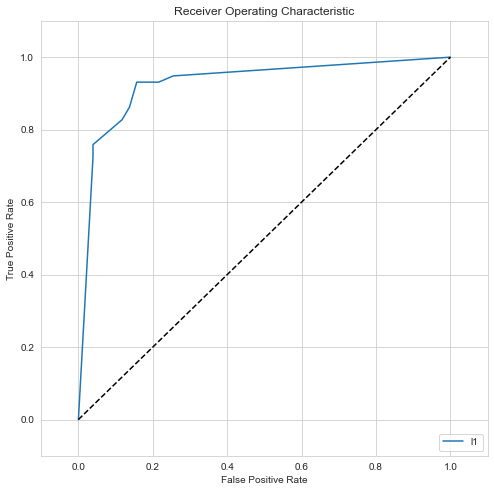

In [49]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# Calculate AUC for Train
roc_auc_score(y_train, DT_y_train_preds)

0.9077057939555851

In [51]:
# Calculate AUC for Test set
DT_auc = auc(fpr, tpr)
print(DT_auc)

0.9279918864097363


### Feature Importance 

In [52]:
indices = np.argsort(-model.best_estimator_.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
chest_pain_type
num_major_vessels
thalassemia
age
cholesterol
max_heart_rate_achieved
sex
exercise_induced_angina
st_depression
resting_blood_pressure
fasting_blood_sugar
rest_ecg
st_slope


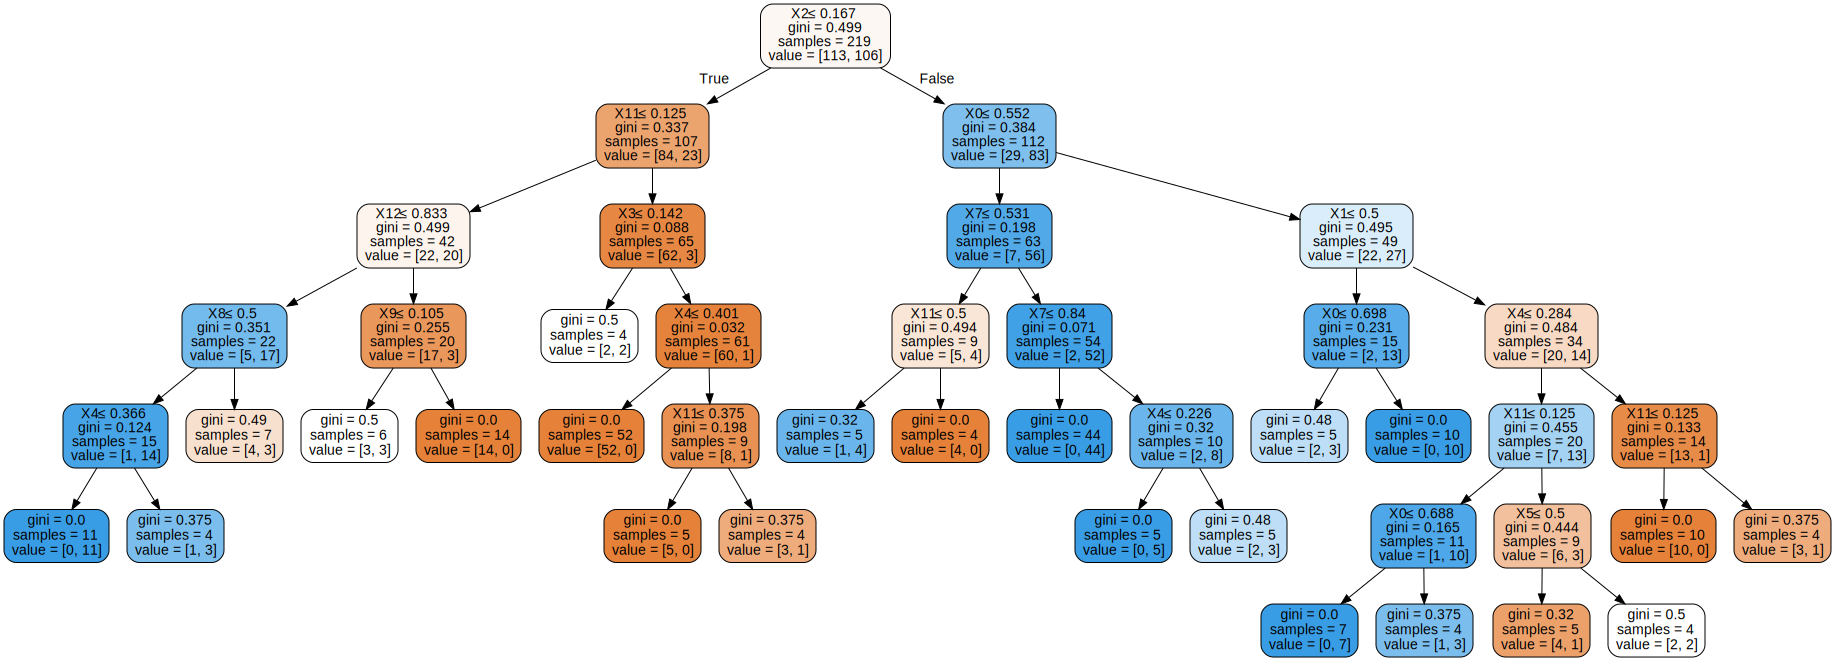

In [53]:
!pip install graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + r"D:\anaconda3\Library\bin\graphviz"
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(DTmodel, out_file=None,  
                 filled=True, rounded=True,
                 special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph = graphviz.Source(dot_data)
graph

## 2.Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = RandomizedSearchCV(LogisticRegression(), tuned_params,n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [55]:
LRmodel = model.best_estimator_
LRmodel

LogisticRegression(C=1)

In [56]:
LR_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(LR_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(LR_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(LR_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(LR_y_train_preds, y_train),"\n")

LR_y_test_preds = model.predict(X_test)

LR_accuracy =  accuracy_score(LR_y_test_preds, y_test)

print("Accuracy on testing set: ", LR_accuracy,"\n")

print("Precision on testing set: ", precision_score(LR_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(LR_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(LR_y_test_preds, y_test),"\n")

Accuracy on training set:  0.8447488584474886 

Precision on training set:  0.8584905660377359 

Recall on training set:  0.8272727272727273 

F1 score on training set:  0.8425925925925927 

Accuracy on testing set:  0.8532110091743119 

Precision on testing set:  0.8793103448275862 

Recall on testing set:  0.85 

F1 score on testing set:  0.864406779661017 



In [57]:
print(classification_report(y_train, LR_y_train_preds))
print(classification_report(y_test,LR_y_test_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       113
           1       0.83      0.86      0.84       106

    accuracy                           0.84       219
   macro avg       0.84      0.85      0.84       219
weighted avg       0.85      0.84      0.84       219

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        51
           1       0.85      0.88      0.86        58

    accuracy                           0.85       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.85      0.85      0.85       109



In [58]:
crossLR = cross_val_score(LRmodel,X,y,cv=cv,scoring = "accuracy")
print(crossLR)
np.mean(crossLR)

[0.85454545 0.81651376 0.82568807]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.83224909646928

In [59]:
LRy_test_prob = model.predict_proba(X_test)[:,1]
LRy_test_prob [:10]

array([0.27315031, 0.5338828 , 0.07706248, 0.79399698, 0.6175609 ,
       0.0578244 , 0.81853827, 0.11503432, 0.44716398, 0.35358194])

In [60]:
ConfusionMatrixToDataFrame(y_test,LR_y_test_preds)

,true,false
positive,51,9
negative,42,7


In [61]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, LRy_test_prob)

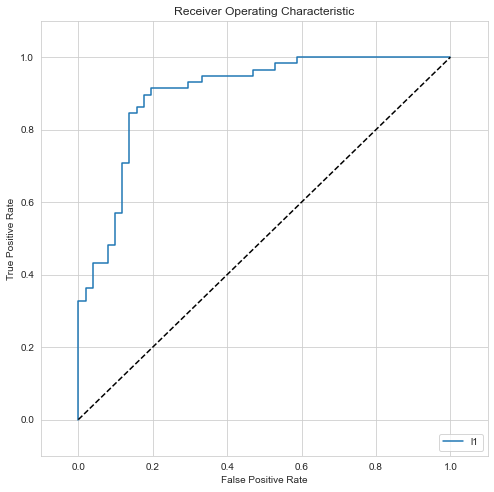

In [62]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,LR_y_test_preds))

0.8514198782961461


In [64]:
# Calculate AUC for Test set
LR_auc = auc(fpr, tpr)
print(LR_auc)

0.898580121703854


### Feature Importance

In [65]:
indices = np.argsort(-abs(LRmodel.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
num_major_vessels
chest_pain_type
sex
st_depression
max_heart_rate_achieved
resting_blood_pressure
thalassemia
exercise_induced_angina
cholesterol
rest_ecg
age
st_slope
fasting_blood_sugar


## 3. Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
tuned_params = {'n_estimators':[3,10,15],'max_depth':[3,10,15], 'max_features':['auto',None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [3, 10, 15],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 10, 15]},
                   scoring='roc_auc')

In [67]:
RFmodel = model.best_estimator_
RFmodel

RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=15)

In [68]:
RF_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(RF_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(RF_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(RF_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(RF_y_train_preds, y_train),"\n")

RF_y_test_preds = model.predict(X_test)

RF_accuracy = accuracy_score(RF_y_test_preds, y_test)

print("Accuracy on testing set: ", RF_accuracy,"\n")

print("Precision on testing set: ", precision_score(RF_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(RF_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(RF_y_test_preds, y_test),"\n")

Accuracy on training set:  0.9269406392694064 

Precision on training set:  0.9433962264150944 

Recall on training set:  0.9090909090909091 

F1 score on training set:  0.9259259259259259 

Accuracy on testing set:  0.8440366972477065 

Precision on testing set:  0.8103448275862069 

Recall on testing set:  0.8867924528301887 

F1 score on testing set:  0.8468468468468469 



In [69]:
print(classification_report(y_train, RF_y_train_preds))
print(classification_report(y_test,RF_y_test_preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       113
           1       0.91      0.94      0.93       106

    accuracy                           0.93       219
   macro avg       0.93      0.93      0.93       219
weighted avg       0.93      0.93      0.93       219

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.89      0.81      0.85        58

    accuracy                           0.84       109
   macro avg       0.85      0.85      0.84       109
weighted avg       0.85      0.84      0.84       109



In [70]:
crossRF = cross_val_score(RFmodel,X,y,cv=cv,scoring = "accuracy")
print(crossRF)
np.mean(crossRF)

[0.82727273 0.79816514 0.79816514]


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.807867667500695

In [71]:
RFy_test_prob = model.predict_proba(X_test)[:,1]
RFy_test_prob [:10]

array([0.70886924, 0.4736526 , 0.01822933, 0.82935797, 0.49547979,
       0.01822933, 0.4278477 , 0.03809149, 0.34086973, 0.38723728])

In [72]:
ConfusionMatrixToDataFrame(y_test,RF_y_test_preds)

,true,false
positive,47,6
negative,45,11


In [73]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, RFy_test_prob)

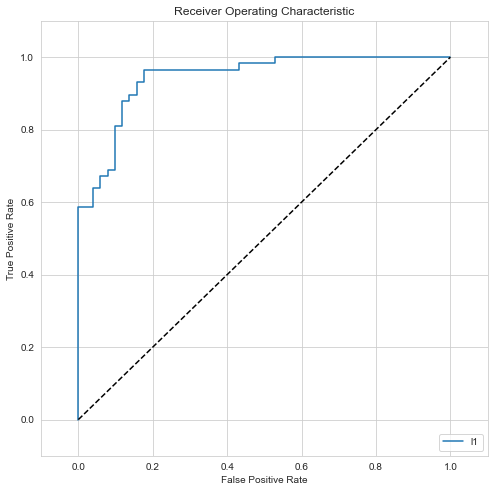

In [74]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,RF_y_test_preds))

0.8463488843813387


In [76]:
# Calculate AUC for Test set
RF_auc = auc(fpr, tpr)
print(RF_auc)

0.9442190669371197


## Feature Importance

In [77]:
indices = np.argsort(-RFmodel.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
num_major_vessels
chest_pain_type
thalassemia
age
st_depression
cholesterol
max_heart_rate_achieved
sex
resting_blood_pressure
st_slope
exercise_induced_angina
fasting_blood_sugar
rest_ecg


## 4. Support Vector Machine

In [78]:
from sklearn import svm
from sklearn.svm import SVC
tuned_params = {'kernel':['poly','rbf','linear'], 'C':[0.001,1,1000],'probability':[True]}
model = RandomizedSearchCV(svm.SVC(), tuned_params, n_iter=9, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(estimator=SVC(), n_iter=9, n_jobs=-1,
                   param_distributions={'C': [0.001, 1, 1000],
                                        'kernel': ['poly', 'rbf', 'linear'],
                                        'probability': [True]},
                   scoring='roc_auc')

In [79]:
SVCmodel = model.best_estimator_
SVCmodel

SVC(C=1000, probability=True)

In [80]:
SVC_y_train_preds = model.predict(X_train)
print("Accuracy on training set: ", accuracy_score(SVC_y_train_preds, y_train),"\n")

print("Precision on training set: ", precision_score(SVC_y_train_preds, y_train),"\n")

print("Recall on training set: ", recall_score(SVC_y_train_preds, y_train),"\n")

print("F1 score on training set: ", f1_score(SVC_y_train_preds, y_train),"\n")

SVC_y_test_preds = model.predict(X_test)

SVC_accuracy = accuracy_score(SVC_y_test_preds, y_test)

print("Accuracy on testing set: ", SVC_accuracy ,"\n")

print("Precision on testing set: ", precision_score(SVC_y_test_preds, y_test),"\n")

print("Recall on testing set: ", recall_score(SVC_y_test_preds, y_test),"\n")

print("F1 score on testing set: ", f1_score(SVC_y_test_preds, y_test),"\n")

Accuracy on training set:  1.0 

Precision on training set:  1.0 

Recall on training set:  1.0 

F1 score on training set:  1.0 

Accuracy on testing set:  0.8165137614678899 

Precision on testing set:  0.7758620689655172 

Recall on testing set:  0.8653846153846154 

F1 score on testing set:  0.8181818181818181 



In [81]:
print(classification_report(y_train, SVC_y_train_preds))
print(classification_report(y_test,SVC_y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       106

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        51
           1       0.87      0.78      0.82        58

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.82      0.82      0.82       109



In [82]:
crossSVC = cross_val_score(SVCmodel,X,y,cv=cv,scoring = "accuracy")
print(crossSVC)
np.mean(crossSVC)

[0.86363636 0.83486239 0.83486239]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8444537114261884

In [83]:
SVC_y_test_prob = model.predict_proba(X_test)[:,1]
SVC_y_test_prob [:10]

array([0.82903913, 0.5131196 , 0.04040932, 0.78349246, 0.53703941,
       0.01572871, 0.81174396, 0.11899896, 0.24781956, 0.07150981])

In [84]:
ConfusionMatrixToDataFrame(y_test,SVC_y_test_preds)

,true,false
positive,45,7
negative,44,13


In [85]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, SVC_y_test_prob)

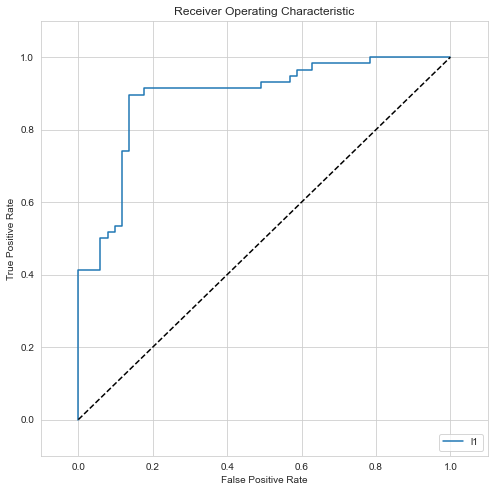

In [86]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
# Calculate AUC for Train set
print(roc_auc_score(y_test,SVC_y_test_preds))

0.8193035835023665


In [88]:
# Calculate AUC for Test set
SVC_auc= auc(fpr, tpr)
print(SVC_auc)

0.8904665314401622


## Accuracy Report 

Below is a report on accuracy and AUC score of each model

In [89]:
accuracyScore = [DT_accuracy, LR_accuracy, RF_accuracy, SVC_accuracy]
aucScore = [DT_auc, LR_auc, RF_auc, SVC_auc]

accuracyReport = pd.DataFrame(accuracyScore, index=['Decision Tree','Logistic Regression','Random Forest','SVM'])
accuracyReport.columns = ['Accuracy Score']
accuracyReport.insert(loc=1, column='AUC SCORE',value=aucScore)
accuracyReport.columns.name = 'Algorithm'
accuracyReport

Algorithm,Accuracy Score,AUC SCORE
Decision Tree,0.853211,0.927992
Logistic Regression,0.853211,0.898580
Random Forest,0.844037,0.944219
SVM,0.816514,0.890467


The accuracy report shows the performance of each algorithm on test data

## Saving the winning model

In [90]:
import joblib

In [91]:
win_model = RFmodel
win_model.fit(X_train, y_train)
with open('HeartDisease.pkl', 'wb') as pickle_file:
      joblib.dump(win_model, 'HeartDisease.pkl')

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
